In [8]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [9]:
X, y = load_boston(return_X_y=True)
print(X.shape)  #共506件房屋、13個自變數

(506, 13)


In [10]:
boston = load_boston()
X = boston.data   #自變數的部分
y = boston.target  #要預測的標的, 實際的值
print(boston.DESCR)  #資料的內容含有哪些, 包含13個自變數的意義

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

y = 房價 = f(CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT) = w1*CRIM + w2*ZN + w3*INDUS + w4*CHAS + w5*NOX + w6*RM + w7*AGE + w8*DIS + w9*RAD + w10*TAX + w11*PTRATIO + w12*B + w13*LSTAT + w0

第一步 : 先做線性回歸看看

In [11]:
stp1 = LinearRegression()
stp1.fit(X, y)
print('線性回歸的結果:')
for f,w in zip(boston.feature_names, stp1.coef_):
  print('自變數 ', f, ' 的權重: ', w)
print('係數平方和: ', sum(stp1.coef_ ** 2))

線性回歸的結果:
自變數  CRIM  的權重:  -0.10801135783679545
自變數  ZN  的權重:  0.04642045836688176
自變數  INDUS  的權重:  0.02055862636707862
自變數  CHAS  的權重:  2.6867338193448966
自變數  NOX  的權重:  -17.766611228300167
自變數  RM  的權重:  3.809865206809212
自變數  AGE  的權重:  0.0006922246403425021
自變數  DIS  的權重:  -1.475566845600255
自變數  RAD  的權重:  0.30604947898517226
自變數  TAX  的權重:  -0.01233459391657437
自變數  PTRATIO  的權重:  -0.9527472317072923
自變數  B  的權重:  0.009311683273793711
自變數  LSTAT  的權重:  -0.5247583778554923
係數平方和:  340.85463178802814


第二步 : Ridge回歸, 照理說透過係數平方和可以觀察, 是否整體的數值變小

**這裡Scikit-learn的alpha就是講義的lambda**

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

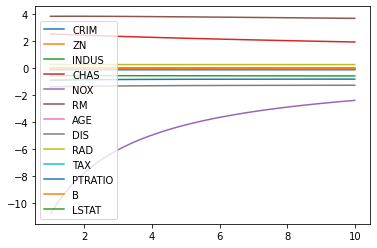

In [13]:
fr = open('Ridge回歸.txt','w')

x_axis = []
y_axis = []

a = 10.0
while a > 1.0:

  x_axis.append(a)

  stp2 = Ridge(alpha=a)
  stp2.fit(X, y)
  print(f'Ridge回歸的結果, alpha={a} :',file=fr)

  tmp = []

  for f,w in zip(boston.feature_names, stp2.coef_):
    print(f'自變數 {f} 的權重: {w}', file=fr)
    tmp.append(w)

  y_axis.append(tmp)

  print(f'係數平方和: {sum(stp2.coef_ ** 2)}', file=fr)
  print('',file=fr)
  a = a - 0.2
fr.close()

y1 = []
for d in y_axis:
  y1.append(d[0])
y2 = []
for d in y_axis:
  y2.append(d[1])
y3 = []
for d in y_axis:
  y3.append(d[2])
y4 = []
for d in y_axis:
  y4.append(d[3])
y5 = []
for d in y_axis:
  y5.append(d[4])
y6 = []
for d in y_axis:
  y6.append(d[5])
y7 = []
for d in y_axis:
  y7.append(d[6])
y8 = []
for d in y_axis:
  y8.append(d[7])
y9 = []
for d in y_axis:
  y9.append(d[8])
y10 = []
for d in y_axis:
  y10.append(d[9])
y11 = []
for d in y_axis:
  y11.append(d[10])
y12 = []
for d in y_axis:
  y12.append(d[11])
y13 = []
for d in y_axis:
  y13.append(d[12])

plt.plot(x_axis, y1)
plt.plot(x_axis, y2)
plt.plot(x_axis, y3)
plt.plot(x_axis, y4)
plt.plot(x_axis, y5)
plt.plot(x_axis, y6)
plt.plot(x_axis, y7)
plt.plot(x_axis, y8)
plt.plot(x_axis, y9)
plt.plot(x_axis, y10)
plt.plot(x_axis, y11)
plt.plot(x_axis, y12)
plt.plot(x_axis, y13)
plt.legend(['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])
plt.show()

第三步 : Lasso回歸, 照理說有些自變數很明顯可以看出來不重要了

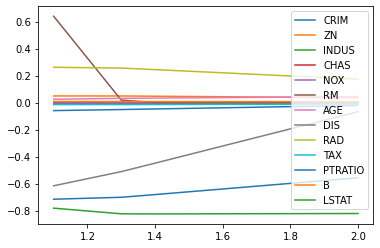

In [14]:
fl = open('Lasso回歸.txt','w')

x_axis = []
y_axis = []

a = 2.0
while a > 1.0:

  x_axis.append(a)

  stp3 = Lasso(alpha=a)
  stp3.fit(X, y)
  print(f'Lasso回歸的結果, alpha={a} :', file=fl)

  tmp = []

  for f,w in zip(boston.feature_names, stp3.coef_):
    print(f'自變數 {f} 的權重: {w}', file=fl)
    tmp.append(w)

  y_axis.append(tmp)

  print(f'係數平方和: {sum(stp3.coef_ ** 2)}', file=fl)
  print('',file=fl)
  a = a - 0.1
fl.close()

y1 = []
for d in y_axis:
  y1.append(d[0])
y2 = []
for d in y_axis:
  y2.append(d[1])
y3 = []
for d in y_axis:
  y3.append(d[2])
y4 = []
for d in y_axis:
  y4.append(d[3])
y5 = []
for d in y_axis:
  y5.append(d[4])
y6 = []
for d in y_axis:
  y6.append(d[5])
y7 = []
for d in y_axis:
  y7.append(d[6])
y8 = []
for d in y_axis:
  y8.append(d[7])
y9 = []
for d in y_axis:
  y9.append(d[8])
y10 = []
for d in y_axis:
  y10.append(d[9])
y11 = []
for d in y_axis:
  y11.append(d[10])
y12 = []
for d in y_axis:
  y12.append(d[11])
y13 = []
for d in y_axis:
  y13.append(d[12])

plt.plot(x_axis, y1)
plt.plot(x_axis, y2)
plt.plot(x_axis, y3)
plt.plot(x_axis, y4)
plt.plot(x_axis, y5)
plt.plot(x_axis, y6)
plt.plot(x_axis, y7)
plt.plot(x_axis, y8)
plt.plot(x_axis, y9)
plt.plot(x_axis, y10)
plt.plot(x_axis, y11)
plt.plot(x_axis, y12)
plt.plot(x_axis, y13)
plt.legend(['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])
plt.show()

這樣的結果是不是可以看出來 :
有相關的, 必然是lambda不為零的；為零的都可以砍了！因為0乘上任何值均為0

然後有相關的有正有負，所以是不是就知道哪些是正相關(房價會上漲的原因)、哪些是負相關(房價下滑的原因)